In [1]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2024-06-06 22:50:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1,36M  --.-KB/s    in 0,07s   

2024-06-06 22:50:10 (18,3 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



## Data preparation

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [133]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [134]:
df = pd.read_csv("housing.csv")

columns = [ 'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

df_full = df[columns]

In [135]:
df_full.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [136]:
df_full["total_bedrooms"] = df_full.total_bedrooms.fillna(df_full.total_bedrooms.median())

df_full["rooms_per_household"] = df_full["total_rooms"]/df_full["households"]
df_full["bedrooms_per_room"] = df_full["total_bedrooms"]/df_full["total_rooms"]
df_full["population_per_household"] = df_full["population"]/df_full["households"]

## Question 1
### What is the most frequent observation (mode) for the column ocean_proximity?

In [137]:
df_full.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

## Question 2

1. Create the correlation matrix for the numerical features of your train dataset.
    1. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

In [138]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
df_full[numerical].corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.098619,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.081205,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135622,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187381,-0.024581
total_bedrooms,-0.066484,0.069120,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.071649,-0.028325
population,-0.108785,0.099773,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.010035,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.034498,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.545298,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.233303,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.370308,-0.004852


<Axes: >

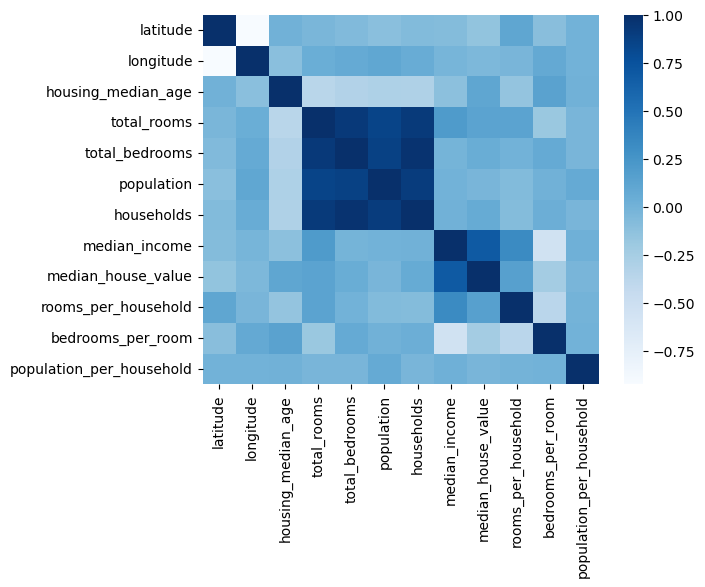

In [139]:
sns.heatmap(df_full[numerical].corr(), cmap="Blues")

### What are the two features that have the biggest correlation in this dataset? households and total_bedrooms

#### Make median_house_value binary

    We need to turn the median_house_value variable from numeric into binary.
    Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

#### Split the data

    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value (median_house_value) is not in your dataframe.


In [140]:
df_full["above_average"] = (df_full.median_house_value > df_full.median_house_value.mean()).astype(int)

In [141]:
train_full, test = train_test_split(df_full, random_state=42,  test_size=0.2)
train, val = train_test_split(train_full, random_state=42, test_size=0.25)

## Question 3

1. Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
2. Round it to 2 decimals using round(score, 2)
3. What is their mutual information score?


In [142]:
round(mutual_info_score(train["above_average"], train["ocean_proximity"]), 2)

0.1

## Question 4

1. Now let's train a logistic regression
2. Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
3. Fit the model on the training dataset.
4. To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
5. model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
6. Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [165]:
y_train, y_val, y_test = train["above_average"], val["above_average"], test["above_average"]

In [162]:
x_train = pd.get_dummies(train.drop(columns=["above_average", "median_house_value"]), 
                         prefix="ocean_proximity", columns=["ocean_proximity"], dtype=int, drop_first=True)
x_val = pd.get_dummies(val.drop(columns=["above_average", "median_house_value"]), 
                       prefix="ocean_proximity", columns=["ocean_proximity"], dtype=int, drop_first=True)
x_test = pd.get_dummies(test.drop(columns=["above_average", "median_house_value"]), 
                        prefix="ocean_proximity", columns=["ocean_proximity"], dtype=int, drop_first=True)

In [163]:
x_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,0,0,0,0
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0,0,0,1
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,1,0,0,0
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,0,0,0,0
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0,0,0,1


In [166]:
lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [167]:
y_pred_val = lr.predict_proba(x_val)[:,1]
y_pred_val = (y_pred_val>=0.5).astype(int)
round((y_pred_val ==  y_val).mean(),2)

0.84

## Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference? --> **"total_rooms"**

In [174]:
lr.fit(x_train.drop(columns=["total_rooms"]), y_train)

y_pred_val = lr.predict_proba(x_val.drop(columns=["total_rooms"]))[:,1]
y_pred_val = (y_pred_val>=0.5).astype(int)
(y_pred_val ==  y_val).mean()  

0.8381782945736435

In [175]:
lr.fit(x_train.drop(columns=["total_bedrooms"]), y_train)

y_pred_val = lr.predict_proba(x_val.drop(columns=["total_bedrooms"]))[:,1]
y_pred_val = (y_pred_val>=0.5).astype(int)
(y_pred_val ==  y_val).mean()   

0.8364825581395349

In [176]:
lr.fit(x_train.drop(columns=["population"]), y_train)

y_pred_val = lr.predict_proba(x_val.drop(columns=["population"]))[:,1]
y_pred_val = (y_pred_val>=0.5).astype(int)
(y_pred_val ==  y_val).mean()

0.8284883720930233

In [177]:
lr.fit(x_train.drop(columns=["households"]), y_train)

y_pred_val = lr.predict_proba(x_val.drop(columns=["households"]))[:,1]
y_pred_val = (y_pred_val>=0.5).astype(int)
(y_pred_val ==  y_val).mean()   

0.8330910852713178

## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

- If there are multiple options, select the smallest alpha. --> *0*

In [157]:
y_train, y_val, y_test = np.log1p(train["median_house_value"]), np.log1p(val["median_house_value"]), np.log1p(test["median_house_value"])

In [159]:
x_train = pd.get_dummies(train.drop(columns=["above_average", "median_house_value"]), 
                         prefix="ocean_proximity", columns=["ocean_proximity"], dtype=int)
x_val = pd.get_dummies(val.drop(columns=["above_average", "median_house_value"]), 
                       prefix="ocean_proximity", columns=["ocean_proximity"], dtype=int)
x_test = pd.get_dummies(test.drop(columns=["above_average", "median_house_value"]), 
                        prefix="ocean_proximity", columns=["ocean_proximity"], dtype=int)

In [160]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [161]:
import numpy as np
from sklearn.linear_model import Ridge
for a in  [0, 0.01, 0.1, 1, 10]:
    rr = Ridge(alpha=a, solver="sag", random_state=42)
    rr.fit(x_train, y_train)
    y_pred_val = rr.predict(x_val)
    score = round(rmse(y_val, y_pred_val), 3)
    print(a, score)

/home/unjoku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.523


/home/unjoku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.523


/home/unjoku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.523


/home/unjoku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.523
10 0.523


/home/unjoku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
